## Kernel without Data Leakage, following best practices of Machine Learning, that gets you in the top 3% with only 4 features!

## Data Leakage / contamination
Definition: **Data Leakage** or otherwise known as **Data Contamination** is when knowledge about expected results or the test set that the model will run on somehow finds it's way into the model or the data of the model.

Data leakage allows to get amazing results, but doesn't help in real world problems since there this knowledge will not be available (usually we don't know what predictions we'll need to make).

Many of Kaggle competitions allow for data leakage, and best scores are acquired by creating on purpose features that are contaminated.

## Examples of Data Leakage in Titanic dataset:
- `Ticket_Frequency` that looks at test data, and groups by ticket between training and test set
- Scaling based on test and train test together.  
- Looking at distributions of test set, and steering the solution in the direction of better solving the types of observations in test set.
- Extreme case is getting the solutions of the test set from the Internet, and running our models, grid searches and hyperparameter tuning by checking how well we did on the test set.  This will get us a great score, but this process will not be transferable to real world where the real value of prediction is not known, otherwise we wouldn't need a model to predict it. 

## Who is this Kernel for:
- If after getting your hands dirty, doing EDA, building your own models, and trying to improve on it, reading and seeing many different other Titanic kernels, you want to see another **simple elegant solution bottom line** that **follows all the best practices of good Data Science / Machine Learning process**, then this Kernel is for you!  I don't advise it being your first kernel of Titanic.
- The goal is not to show the process in great detail, but the high level process and it's assumptions, and bottom line model. I will give many links to details of the process.

This kernel could be found [here](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/Simplest%20bottom%20line%20Kernel%20for%20Kaggle.ipynb) on Github

## My goal:
I created this kernel after an extensive time that I got my hands dirty and tried many different methods, and variations of the models, features, ensembles, metrics etc.

My goal was not to reach the absolutely best accuracy, but to: **learn and try in practice as much as possible different methods and tools of Data Science / Machine Learning**.

I followed the best practices of Machine Learning, even if it means getting lower accuracy.  Most importantly, there is **no data leakage / data contamination**.  There is an assumption in my work, that test data is not available at the time of training.  This is the proper assumption in most real world problems.
- no features look at the test data in general, and correct results that are available online in particular.  One such example I saw in many kernels is `Ticket_Frequency` feature that takes a party size both from the training and test data together.
- Scaling done only based on train data, and specifically the relevant fold of the train data
- I personally never looked at the correct results available online
- I chose models based on accuracy scores (with cross validation) acquired on **training** data, and didn't just try various combinations and chose what worked best on the test data

**I presume that the score I got of ~82% accuracy is close to the highest score one could get without overfitting on test data.**  

**I would love to hear if someone was able to get significantly better accuracy without using test data, overfitting on test data, or trying directly on test data many possible variations.**

## Assumptions:
- Simplicity over slightly better accuracy.  I was actually able to get a slightly better accuracy (82.3%) which **puts you in top 2% on Kaggle** with a slightly more complicated model, using numerous classifiers and ensembling, but **also without data contamination**.  See details in my [Github project](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic)
- Never use test data in any way
- Choose models based on results on cross validation of train data, and not based on trying combinations on test data

## Process followed:
If some of the below doesn't sound familiar, I suggest to read up on it online, or check out my [Github project](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic)
- Use **numerous classifiers**. Main ones I used are: `LogisticRegression`, `KNeighborsClassifier`, `SVC`, `GaussianNB`, `RandomForestClassifier`, `ExtraTreesClassifier`, `xgboost.XGBClassifier`
- Use **feature engineering** heavily - adding new features that can help (like `Family size`, `Title`, `Deck`, `Known family/ticket survived %`, `Fare per person` and others) - most learned from other great kernels on Kaggle 
- Advanced **Imputing** techniques for features with missing values, especially for `Age` feature using `RandomForestRegressor` using other known features (`Pclass`, `Title`, `Parch`, `SibSp`, `Embarked`)
- Try **variations of representation of the same features** like `Age`, `Fare`, `SibSp`, `Parch`, `Family size` - using the numeric feature as is, bin by survival rate, bin automatically into a certain number of bins, perform transformations like `Log transformation` on `Fare` feature etc.
- Use `RFECV` for **Feature Selection** - instead of manually choosing relevant features, let each model choose it's most helpful features using `RFECV`
- Use **cross validation** heavily on the whole process, with 5 folds and numerous `random_state` values.  What I realized early on, is that test set accuracy results are often unexpected without using cross validation.  Test set accuracy results are even unexpected following using cross validation on the training set.  Therefore, I used cross validation for the whole flow - taking a fold, and doing all the steps above including scaling, automatic feature selection etc. in the fold.  I aslo looked for low variance models, since higher accuracy models usually overfitted and didn't do well on test data, so I prefered lower variance models even if the accuracy was lower.
- Use more than one **metric**. In addition to `accuracy` (which is the metric Kaggle scores the specific challenge by), use also `ROC AUC score`, `F1 score`/`Precision`/`Recall`.  However, because of a very large difference between training and test scores, I found the metric of *Cross Validation Accuracy on the whole process - 3 * Standard Deviation* to be the most helpful, since it looks both at the accuracy, but also gives a lot of weight to variance / Standard Deviation.   

See later on in the kernel for other things I tried that didn't help / didn't work.

## Credits:
- In addition to trying many different things myself, I read and tried numerous kernels out there.  One specific one worth mentioning is [this kernel](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial) by Gunes Evitan [@gunesevitan](https://www.kaggle.com/gunesevitan)
- Jason Brownlee from [machinelearningmastery.com](https://machinelearningmastery.com/) for giving me the conviction that Machine Learning can be done as a ordered process

## Solution conclusions:
`ExtraTreesClassifier` with `max_depth=5` did the best as far as cross validated accuracy with only 4 features: `Male`, `Title_Mr`, `Pclass_3`, `Known family/ticket survived %`.  

It knew to generalize well, and didn't overfit, like some of the other classifiers (like `RandomForestClassifier` and `xgboost.XGBClassifier` that went very quickly from not generalizing well to overfitting)

See details in "Details of how arrived at the conclusions" below

## About Extra Trees Classifier:
If you are not familiar with Extra Trees, it is a classifier that is in some way similar to and some ways different from Random Forest.  It is also an ensemble classifier, and a forest of trees, but the trees are even more random than in Random Forest, hense it's also sometimes called "Extremely Randomized Trees".  While Random Forest takes a random subset of features, and then looks for the best split, Extra Trees takes a random subset of features and makes a **random** split and can create many more trees faster (since it doesn't need to calculate the best split), and then check which trees give good scores.  The reasoning why this prevents overfitting for small set of data like the Titanic is because the range of types of trees created by Extra Trees is much larger, and it really finds the generalization with lower variance, while Random Forest will often times overfit on the train data, like in the Titanic case.  It is not the absolute best Classifier, since such a thing doesn't exist, but it works very well for the specific problem of the Titanic, and a nice tool to have in your toolbox when you try numerous classifiers.

You can read more about `ExtraTreesClassifier` here:
- [sklearn help](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
- Great summary on "Towards Data Science" on Medium on differences between Random Forest and Extra Trees, [
"An Intuitive Explanation of Random Forest and Extra Trees Classifiers"](https://towardsdatascience.com/an-intuitive-explanation-of-random-forest-and-extra-trees-classifiers-8507ac21d54b) by Frank Ceballos

## Before we start:
If you haven't done or seen some EDA, statistics of the Titanic dataset, suggest to stop and do so or at least read someone else's.  You can find some on mine here:
- [Initial analysis + Logistic regression](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/initial-titanic-logistic-regression.ipynb)
- [Fare feature investigations](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/Fare_investigation.ipynb)
- [Age feature investigations](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/age_investigation.ipynb)
- [More feature engineering](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/more_feature_engineering.ipynb)
- [Advanced feature engineering](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/Advanced%20feature%20engineering.ipynb)

## Bottom line kernel code:

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [2]:
run_in_kaggle = False

input_dir_local = 'input'
input_dir_kaggle = '/kaggle/input/titanic'

if run_in_kaggle:
    input_dir = input_dir_kaggle
else:
    input_dir = input_dir_local

In [3]:
train = pd.read_csv(input_dir + '/train.csv', index_col='PassengerId')
test = pd.read_csv(input_dir + '/test.csv', index_col='PassengerId')

### Prepare feature `Title_Mr`

In [4]:
main_title_map = {'Lady': 'Mrs', 'Mme': 'Mrs', 'Dona': 'Mrs', 'the Countess': 'Mrs',
         'Ms': 'Miss', 'Mlle': 'Miss',
         'Sir': 'Mr', 'Major': 'Mr', 'Capt': 'Mr', 'Jonkheer': 'Mr', 'Don': 'Mr', 'Col': 'Mr', 'Rev': 'Mr', 'Dr': 'Mr'}

def get_title(full_name):
    return full_name.split(',')[1].split('.')[0].strip()

def set_title_mr(data):
    titles = data['Name'].apply(get_title).replace(main_title_map)
    data['Title_Mr'] = titles.apply(lambda title: 1 if title == 'Mr' else 0)

set_title_mr(train)
set_title_mr(test)

### Prepare feature `Male`

In [5]:
male_map = {'male': 1, 'female': 0}
train['Male'] = train['Sex'].map(male_map)
test['Male'] = test['Sex'].map(male_map)

### Prepare feature `Pclass_3`

In [6]:
class3_map = {1: 0, 2: 0, 3: 1}
train['Pclass_3'] = train['Pclass'].map(class3_map)
test['Pclass_3'] = test['Pclass'].map(class3_map)

### Prepare feature `Known family/ticket survived %`

**Credit:** the idea taken from [this kernel](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial) by Gunes Evitan [@gunesevitan](https://www.kaggle.com/gunesevitan)

**Step 1 survival rate:** Prepare last name that will be needed for a decision if passengers belong to the same family

In [7]:
def extract_lastname(full_name):
    return full_name.split(',')[0]

train['Last name'] = train['Name'].apply(extract_lastname)
test['Last name'] = test['Name'].apply(extract_lastname)

**Step 2 survival rate:** do the actual calculation of `Known family/ticket survived %`

**Explanation**:
- In general, it seems that families/parties traveling together survived mostly together, meaning that many families survived fully, or perished fully.  Although there are families where some members survived, and some didn't, survival rate of the rest of the family members is a good predictor of survival of the rest of the family.
- There are 2 ways to recognize family:
  - By ticket number.  This is a very good way to recognize a party traveling together, even if they don't have the same last name, or are not related.
  - By last name.  This is not perfect. There are 2 issues: 
      - There is a party traveling together, possibly related but not with the same last name, like a married daughter etc.  This is resolved partially by splitting into parties based on ticket number.
      - There are some common last names.  See my github notebook [here](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/Same%20last%20name%20different%20deck%2C%20embarked%2C%20pclass.ipynb) where I suggest another step of recognizing people with same last name, but that are probably not the same family since they didn't embark at the same place, are not traveling in the same class or deck, and not considering them the same family.
- We calculate separately known ticket survival rate based on training set only, and "family" survival rate.
- If only one of them know for a specific passenger, take it as the final `Known family/ticket survived %`
- If both ticket and family survival rates are known, average them for the final value of `Known family/ticket survived %`

In [8]:
def prepare_family_ticket_frequencies_actual(data, is_train, train, last_names_survival, tickets_survival):
    data['Known family/ticket survived %'] = np.NaN

    mean_train_survive = train['Survived'].mean()

    # go over all test passengers, and fill in the survival information
    for i in data.index:
        did_survive = 1 if (is_train == 1) and (train.loc[i, 'Survived'] == 1) else 0
        last_name = data.loc[i, 'Last name']
        ticket = data.loc[i, 'Ticket']
        family_survived = np.NaN
        ticket_survived = np.NaN

        # if have other passengers in training set of same family whose survival information is known, copy average here
        if last_name in last_names_survival:
            last_name_count, last_name_sum = last_names_survival[last_name]
            # if from test set, take family survival information as is. 
            # If from train set, need to remove the specific passenger from the average, since the information should be about rest of the family
            if last_name_count > is_train:
                family_survived = (last_name_sum - did_survive) / (last_name_count - is_train)

        # if have other passengers in training set of same family whose survival information is known, copy average here
        # add information for training only of how many of known survived in the same ticket
        if ticket in tickets_survival:
            ticket_count, ticket_sum = tickets_survival[ticket]
            # if from test set, take ticket survival information as is. 
            # If from train set, need to remove the specific passenger from the average, since the information should be about rest of the party
            if ticket_count > is_train:
                ticket_survived = (ticket_sum - did_survive) / (ticket_count - is_train)

        # For final value - take average if both known, or take whatever is known.  If neither family, nor ticket survival known, take mean survival rate
        if np.isnan(family_survived) == False:
            if np.isnan(ticket_survived) == False:
                # both family and ticket survival rates known, take average
                data.loc[i, 'Known family/ticket survived %'] = (family_survived + ticket_survived) / 2
            else:
                # only family survival known, take it
                data.loc[i, 'Known family/ticket survived %'] = family_survived
        elif np.isnan(ticket_survived) == False:
            # only ticket is known - take value from ticket
            data.loc[i, 'Known family/ticket survived %'] = ticket_survived
        else:
            # none known, set mean survival value
            data.loc[i, 'Known family/ticket survived %'] = mean_train_survive
            
    
def prepare_family_ticket_frequencies(train, test):

    # Prepare survival information for families based on last name
    last_names_survival = {}

    for last_name in (set(train['Last name'].unique()) | set(test['Last name'].unique())):
        last_name_survived = train[train['Last name'] == last_name]['Survived']
        if last_name_survived.shape[0] > 0:
            last_names_survival[last_name] = (last_name_survived.count(), last_name_survived.sum())

    # Prepare survival information for parties based on same ticket
    tickets_survival = {}

    for ticket in (set(train['Ticket'].unique()) | set(test['Ticket'].unique())):
        ticket_survived = train[train['Ticket'] == ticket]['Survived']
        if ticket_survived.shape[0] > 0:
            tickets_survival[ticket] = (ticket_survived.count(), ticket_survived.sum())

    prepare_family_ticket_frequencies_actual(train, True, train, last_names_survival, tickets_survival)
    prepare_family_ticket_frequencies_actual(test, False, train, last_names_survival, tickets_survival)

In [9]:
prepare_family_ticket_frequencies(train, test)

### Checking that feature engineering was done properly

In [10]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Mr,Male,Pclass_3,Last name,Known family/ticket survived %
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,1,Braund,0.000000
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,Cumings,0.383838
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Heikkinen,0.383838
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,Futrelle,0.000000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,Allen,1.000000


In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Mr,Male,Pclass_3,Known family/ticket survived %
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.603816,0.647587,0.551066,0.418411
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489378,0.477990,0.497665,0.312806
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.383838
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000,0.383838
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.408333
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [12]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Mr,Male,Pclass_3,Last name,Known family/ticket survived %
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,1,Kelly,0.750000
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,Wilkes,0.383838
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,Myles,0.383838
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,1,Wirz,0.383838
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,Hirvonen,1.000000


In [13]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Title_Mr,Male,Pclass_3,Known family/ticket survived %
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.586124,0.636364,0.521531,0.434995
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.493117,0.481622,0.500135,0.331553
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.383838
50%,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000,0.383838
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000,1.000000,0.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000


Indeed there were around ~65% males on Titanic, out of which most were not kids (hence 60% of people were grouped to be `Mr`) and slightly > 50% of passenger class 3.  See some initial EDA (Explority Data Analysis) and descriptive statistics of Titanic dataset [here](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/initial-titanic-logistic-regression.ipynb)

### Prepare data for training

In [14]:
feat_to_train_on = ['Title_Mr', 'Male', 'Pclass_3', 'Known family/ticket survived %']
x_train = train[feat_to_train_on]
y_train = train['Survived']
x_test = test[feat_to_train_on]

In [15]:
x_train.head()

,Title_Mr,Male,Pclass_3,Known family/ticket survived %
PassengerId,,,,
1,1,1,1,0.000000
2,0,0,0,0.383838
3,0,0,1,0.383838
4,0,0,0,0.000000
5,1,1,1,1.000000


In [16]:
x_test.head()

,Title_Mr,Male,Pclass_3,Known family/ticket survived %
PassengerId,,,,
892,1,1,1,0.750000
893,0,0,1,0.383838
894,1,1,0,0.383838
895,1,1,1,0.383838
896,0,0,1,1.000000


## Scaling

Since all the values are already in \[0,1\] range, and ExtraTreesClassifier doesn't need scaling, no scaling was done.  In my full example [here](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic), `MinMaxScaler` was done on all features

## Training

In [17]:
model = ExtraTreesClassifier(max_depth=5, n_estimators=150)
model.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Checking feature importances

In [18]:
feature_importances = pd.DataFrame({'Feature Importance': model.feature_importances_}, index=x_train.columns).\
            sort_values(by='Feature Importance', ascending=False)
feature_importances

,Feature Importance
Title_Mr,0.403188
Male,0.235606
Known family/ticket survived %,0.181605
Pclass_3,0.179601


Seems that most predictive power is whether the person is `Title_Mr` (low survival).

A bit lower predictive power is with features 
- `Male` - *low survival* - based on EDA (see links above), little boys were mostly saved, but male teenagers had lower chance of survival than female teenagers)
- `Pclass_3` - *low survival* for low class travelers
- `Known family/ticket survived %	` - higher party traveling together survival - higher survival for individual in the party

## Checking accuracy metric

Accuracy score of training score without cross-validation:

In [19]:
model.score(x_train, y_train)

0.8529741863075196

Accuracy with cross validation with different number of folds:

In [20]:
def cross_val(num_folds):
    accuracies = cross_val_score(model, x_train, y_train, cv=num_folds)
    print(f'Cross validation accuracy with {num_folds} folds: ' 
          f'Mean: {accuracies.mean().round(3)}, STD: {accuracies.std().round(3)}, '
          f'Mean-3*STD (lowest accuracy with 99.7% certainty): {(accuracies.mean() - 3*accuracies.std()).round(3)}')

In [21]:
cross_val(3)
cross_val(5)
cross_val(10)

Cross validation accuracy with 3 folds: Mean: 0.852, STD: 0.01, Mean-3*STD (lowest accuracy with 99.7% certainty): 0.822
Cross validation accuracy with 5 folds: Mean: 0.852, STD: 0.018, Mean-3*STD (lowest accuracy with 99.7% certainty): 0.799
Cross validation accuracy with 10 folds: Mean: 0.853, STD: 0.033, Mean-3*STD (lowest accuracy with 99.7% certainty): 0.755


Based on these scores, we can be relatively confident to get at least 75.5% accuracy, and most probably above 80% on test score

## Preparing predictions

In [22]:
preds = model.predict(x_test)
x_test_with_preds = x_test.copy()
x_test_with_preds['Survived'] = preds
x_test_with_preds[['Survived']].to_csv('preds.csv')

That's it, we are done!

## Details of how arrived at the conclusions above
In the final runs, the following were used:
- Classifiers: 
  - LogisticRegression(solver='lbfgs')
  - KNeighborsClassifier(n_neighbors=8)
  - SVC(gamma='auto', kernel='rbf', probability=True)
  - RandomForestClassifier(n_estimators=250, max_depth=7)
  - ExtraTreesClassifier(max_depth=5, n_estimators=150)
  - XGBClassifier(objective='binary:logistic', n_estimators=250)
- Features
  - All possible features were included (~40-50 depending if the features were binned or not)
  - Features representations / views combinations: 
    - With / without binning of `Family size`
    - With / without binning of `Age`
  - Example of features used: `Male`, `SibSp`, `Parch`, `Fare 13.5+`, `Fare log`, `Title_Master`, `Title_Miss`, `Title_Mr`, `Title_Mrs`, `SibSpBin_0`, `SibSpBin_1`, `SibSpBin_2`, `SibSpBin_3`, `SibSpBin_4`, `SibSpBin_5+`, `ParchBin_0`, `ParchBin_1`, `ParchBin_2`, `ParchBin_3`, `ParchBin_4+`, `Family size`, `Family size bin_1`, `Family size bin_23`, `Family size bin_4`, `Family size bin_567`, `Family size bin_8+`, `DeckBin_AG`, `DeckBin_B`, `DeckBin_CF`, `DeckBin_DE`, `DeckBin_unknown_T`, `Pclass_1`, `Pclass_2`, `Pclass_3`, `Embarked_C`, `Embarked_Q`, `Embarked_S`, `Known family/ticket survived %`, `Age`, `Age Bin_-4`, `Age Bin_11-24`, `Age Bin_24-32`, `Age Bin_32-42`, `Age Bin_4-11`, `Age Bin_42+`

Full results file can be found [here](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/output/best/2019_12_30_11_23_12/results%20with%20colors.xlsx) 

All models:
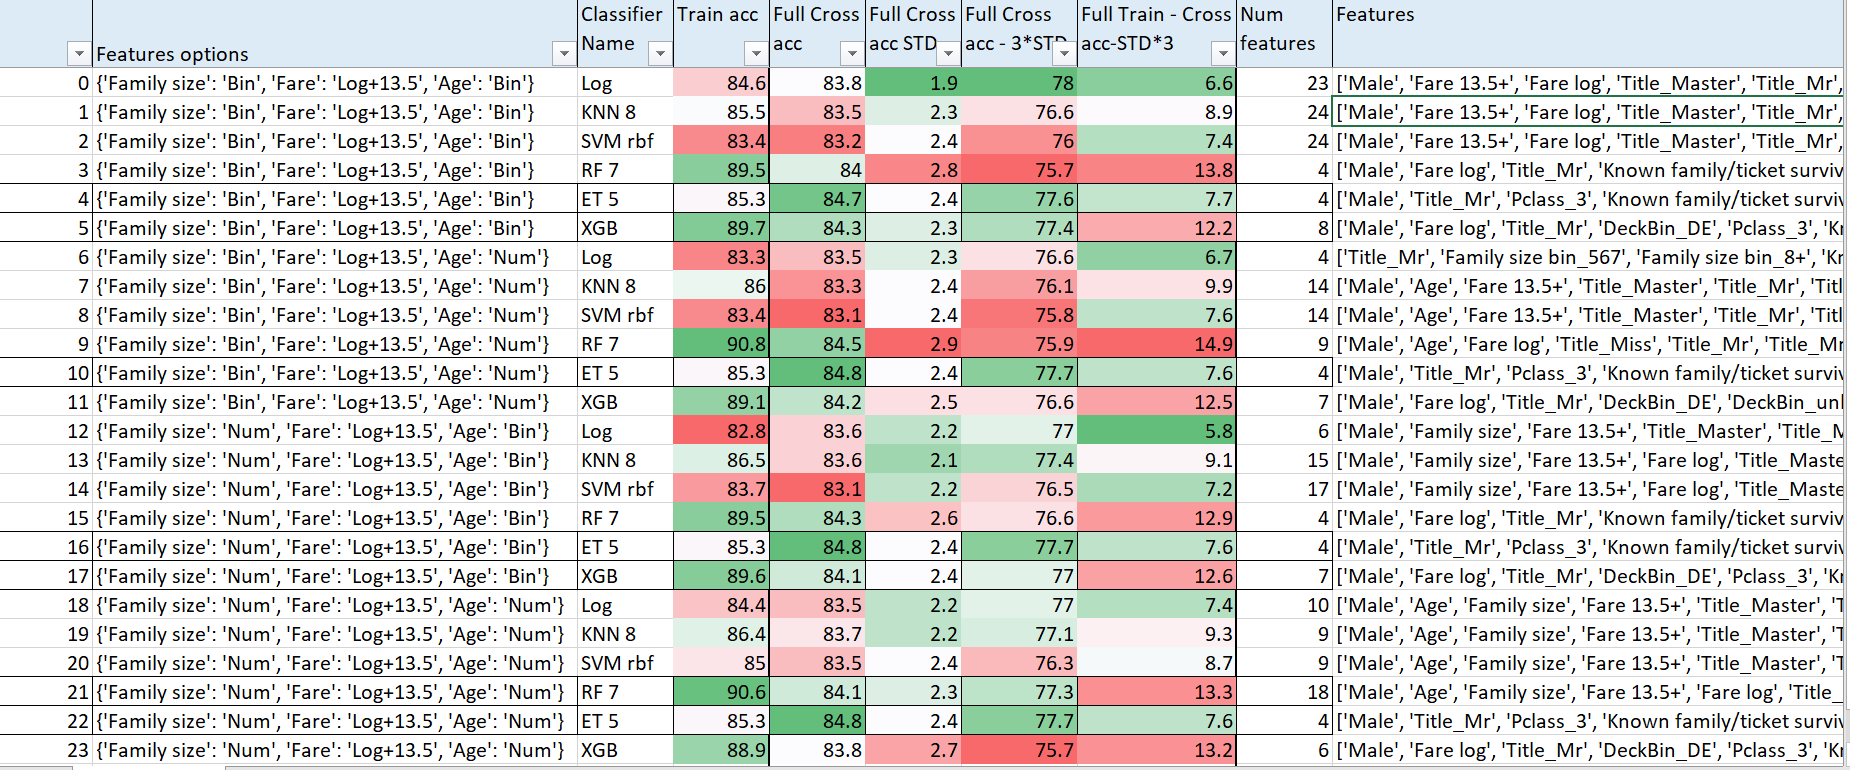

Choosing 1/4 of the models with best *cross validation accuracy - 3 STD*:
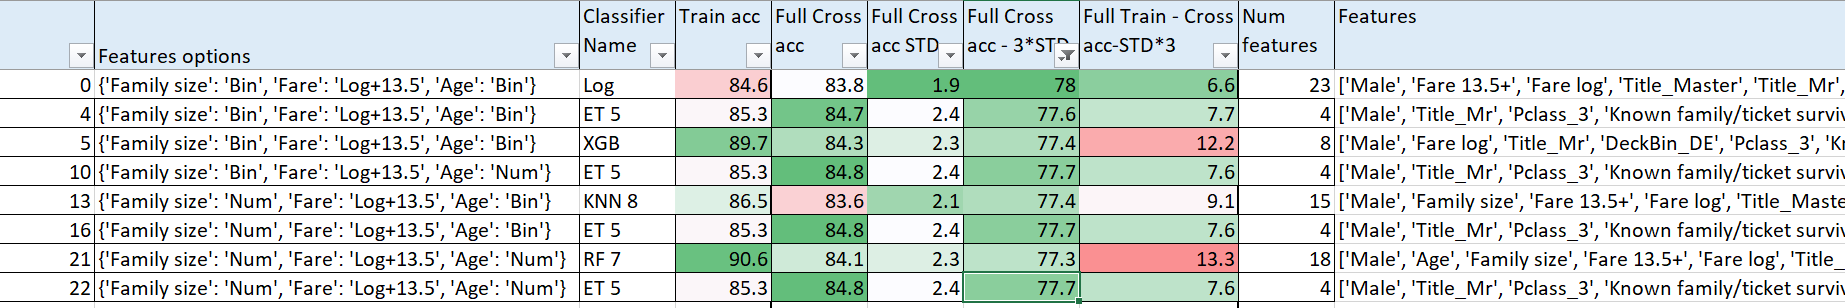

Insights:
- `LogisticRegression` 
  - takes a lot of features (and only the binned variation of features and not continuous values for features like `Age` which makes sense since some of the relationships are not linear)
  - gives best *cross validation accuracy - 3 STD* with lowest variance
- `XGBoostClassifier` and `RandomForestClassifier` clearly overfits (train accuracy ~90%) - not useful.  Indeed shown bad results on the test set
- `KNeighborsClassifier(n_neighbors=8)` gives pretty good accuracies and pretty low variance.
- `ExtraTreesClassifier(max_depth=5)` gives cross validated **best accuracy** and 2nd best after `LogisticRegression` *cross validation accuracy - 3 * STD*

Indeed:
- taking only `ExtraTreesClassifier` gives accuracy of **81.8%** (top 3% of results) on the test set on Kaggel! This is with only 4 features: `Male`, `Title_Mr`, `Pclass_3`, `Known family/ticket survived %`
- Taking 3 best classifiers above (`LogisticRegression`, `KNeighborsClassifier(n_neighbors=8)`, `ExtraTreesClassifier(max_depth=5)`) and doing some ensembling makes the results even slightly better: **82.8%** on Kaggle test set and puts us in **top 2% of the competition** without any data contamination!  See ensembling done on my Github [here](https://github.com/yoni2k/ml-kaggle-challenges/blob/master/titanic/output.py) by using `ExtraTreesClassifier(max_depth=2)` done on the `predict_proba_` results of the 3 classifiers above

## What was tried and didn't work
- Replacing `KFold` with `StratifiedKFold` gave higher variance results instead of low variance results as expected. Therefore, continued using `KFold`
- Bagging using `BaggingClassifier` didn't improve the accuracy or variance.  Tried on various `max_samples`, `max_features`, `bootstrap` values
- Grid searches with `GridSearchCV` on hyperparameters were usually not helpful, since they always gave models overfitting on training set.  It was necessary to try manually different parameters with cross-validatoin.  In the future, plan on using an AutoML tool that would do that.
- Binning values myself based on survival % for `Age` and other numeric features - better to choose Classifiers that can handle doing it on their own (since we can miss connections between numerous features together if doing it manually on our own).
- Choosing relevant features on my own based on correlation between features and feature importances.  Doesn't work since any change in other features, hyperparameter can change the list of best features.  Also, the list is per model.
- Soft and hard voting of different classifiers - improved results slightly, but since I made the change that every classifier chooses it's own features, became not relevant since voting assumes same list of features

#### Thank you! Would love comments and suggestions! 